![pandas](https://www.hanbit.co.kr/data/books/B6417848794_l.jpg)

https://wikidocs.net/32829

### 0. 판다스 시작하기

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. pandas 데이터 구조 소개

#### Series

In [11]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [14]:
# obj.values # numpy의 array 객체. 리스트랑 똑같다.
obj.index  #  range(4) 랑 같다. range가 들어가 있었구나!

RangeIndex(start=0, stop=4, step=1)

In [25]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2
# obj2.index 를 유심히 보라. 1. 문자열도 들어갈 수가 있다. 2. 리스트로 되어 있다. 3. row만 해당. 


d    4
b    7
a   -5
c    3
dtype: int64

In [21]:
obj2

d    4
d    7
d   -5
d    3
dtype: int64

In [33]:
obj2[['c', 'a', 'd', 'd']] # 리스트가 인덱스 선택에 활용됐음을 확인해라

c    3
a   -5
d    4
d    4
dtype: int64

#### DataFrame

In [35]:
# 같은 길이의 리스트로 만들어진 딕셔너리를 이용하면 Series와 DataFrame을 생성할 수 있다.
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [40]:
a = [1,2,4,5]
a[:6]

[1, 2, 4, 5]

In [38]:
frame.head(10)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [43]:
# 만약 원하는 순서대로 columns를 지정하고 싶다면 columns를 지정해주면 된다.
# 엑셀에서 칼럼 옮기기
pd.DataFrame(data, columns=['state', 'pop','year'])

,state,pop,year
0,Ohio,1.5,2000
1,Ohio,1.7,2001
2,Ohio,3.6,2002
3,Nevada,2.4,2001
4,Nevada,2.9,2002
5,Nevada,3.2,2003


In [44]:
# index 값을 숫자로만 넣을 수 있다는 편견을 버리자.
# 없는 Key 값이 있으면 새로 만들고 값이 없으면 NaN으로 채운다.

frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [45]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [48]:
# frame2['state']
frame2.year # 주석 없애고 이 코드도 실행시켜 보자.


one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [62]:
# loc 의 사용 방법을 주목해라. 메소드를 사용하는 것이 아니라 속성처럼 사용한다.
# loc 는 index를 기준으로 값을 찾는다. 그래서 index가 없으면 에러가 난다.
frame2.loc['one':'four', 'state':'pop']



,state,pop
one,Ohio,1.5
two,Ohio,1.7
three,Ohio,3.6
four,Nevada,2.4


In [63]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [77]:
# 냅다 값을 넣으면 해당 컬럼에 모든 값이 그 값으로 채워진다.
frame2['pop']


one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
six      3.2
Name: pop, dtype: float64

In [70]:
# 리스트나 배열을 넣으면 전체에 대입한다. 
frame2['debt'] = range(len(frame2))
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


In [80]:
# Series를 넣으면 index에 맞춰서 대입한다. 없는 index는 NaN으로 채운다.
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt,pop1000
one,2000,Ohio,1.5,NaN,1500.0
two,2001,Ohio,1.7,-1.2,1700.0
three,2002,Ohio,3.6,NaN,3600.0
four,2001,Nevada,2.4,-1.5,2400.0
five,2002,Nevada,2.9,-1.7,2900.0
six,2003,Nevada,3.2,NaN,3200.0


In [83]:
frame2.state == 'Ohio'

one       True
two       True
three     True
four     False
five     False
six      False
Name: state, dtype: bool

In [81]:
# 조건 연산을 통해서 값을 집어 넣는 경우
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,pop1000,eastern
one,2000,Ohio,1.5,NaN,1500.0,True
two,2001,Ohio,1.7,-1.2,1700.0,True
three,2002,Ohio,3.6,NaN,3600.0,True
four,2001,Nevada,2.4,-1.5,2400.0,False
five,2002,Nevada,2.9,-1.7,2900.0,False
six,2003,Nevada,3.2,NaN,3200.0,False


In [85]:
del frame2['pop1000']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [86]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [88]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [89]:
# transpose 로 행과 열을 바꿀 수 있다.
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [90]:
# index가 없는 값으로 만들면, NaN으로 채워진다. 
# 데이터에 다른 길이를 추가 했을 때와는 다른 상황이다.
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [94]:
frame3['Ohio'][:-1]

2001    1.7
2002    3.6
Name: Ohio, dtype: float64

In [95]:
# 리스트 슬라이싱 하듯이 
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [96]:
# index와 columns에 이름을 붙일 수 있다.

frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [97]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [98]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

#### 인덱스(Index)

In [113]:
# 사실 index도 객체이다.
obj = pd.Series(range(3), index=['a', 'b', 'c'])
idx = obj.index
idx
# index 이름을 중복해서 쓸 수 있을까?

Index(['a', 'b', 'c'], dtype='object')

In [114]:
obj

a    0
b    1
c    2
dtype: int64

In [103]:
idx[1:]

Index(['b', 'c'], dtype='object')

In [109]:
obj = obj.reindex(['a','d','c'])
# TypeError 발생. 에러 메시지에 주목하자.

In [111]:
obj['d'] = 2

In [112]:
obj

a    0.0
d    2.0
c    2.0
dtype: float64

In [105]:
# pd.Index를 이용하면 바로 index를 만들 수 있다.
labels = pd.Index(np.arange(3))
# labels = pd.Index(list(range(3)))
labels

Index([0, 1, 2], dtype='int64')

In [106]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [ ]:
obj2.index is labels

### 2. 필수 기능들

In [115]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame


,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [116]:
# index는 mutable 하지 않았기 때문에, reindex 메소드를 사용해 줘야 한다.
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [117]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states) # 사실 columns과 index는 같은 건데, 위치에 따라 이름만 다르다.

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [123]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [124]:
# drop은 index를 기준으로 값을 지운다.
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [125]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [133]:
# column을 지우는 경우에는 axis=1을 넣어준다. 또는 columns를 넣어준다.
# data.drop('two', axis='index')
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [135]:
# inplace=True를 넣어주면 원본이 바뀐다. 다시 할당 말자!!
data.drop('three',axis=1, inplace=True)

KeyError: "['three'] not found in axis"

In [ ]:
obj.drop('c', inplace=True)
obj

#### 선택, 필터링

In [140]:
obj = pd.Series(np.arange(4.), index=['a', 'c', 'b', 'd'])
obj

a    0.0
c    1.0
b    2.0
d    3.0
dtype: float64

In [141]:
# index를 기준으로 정렬한다. 
obj['a':'b']

a    0.0
c    1.0
b    2.0
dtype: float64

In [143]:
obj[:] = 5 
obj
# obj = pd.Series(np.arange(4.), index=['a', 'c', 'b', 'd'])

a    5.0
c    5.0
b    5.0
d    5.0
dtype: float64

In [144]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
dictionary[]

In [146]:
# column을 기준으로 선택할 때 리스트로 전달해줌 주의. (index는 겹괄호를 안해줬다. 데이터프레임이라 이렇다.)
data[['two', 'one']]

,two,one
Ohio,1,0
Colorado,5,4
Utah,9,8
New York,13,12


In [150]:
lst = [1, 2, 3, 4, 5]
list(filter(lambda x: x<=3,lst))

[1, 2, 3]

In [153]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [158]:
# row 기준으로 하는 조건 선택
data[data['two'] > 5]['two'].values

array([ 9, 13])

In [ ]:
data < 5

#### 산술 연산과 데이터 정렬

In [159]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [160]:
# index가 같은 것끼리 연산을 수행한다. 
# index가 교집합인 값만 연산을 수행한다.
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [161]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df1)
print(df2)

            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0
          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0


In [162]:
df1 + df2 # 1. index를 맞춰서 연산을 진행했다. 2. 정렬은 알파벳 순으로 다시 했다. 3. 교집합만 연산을 한다. 4. index 값들은 합집합 한다.

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


#### Apply, Map

,b,d,e
Utah,-0.163538,0.618601,0.809807
Ohio,0.870449,-0.991302,-1.029781
Texas,-0.725739,1.746182,0.630616
Oregon,-0.259505,-1.051303,-1.230582


<Axes: xlabel='SECRETARY2'>

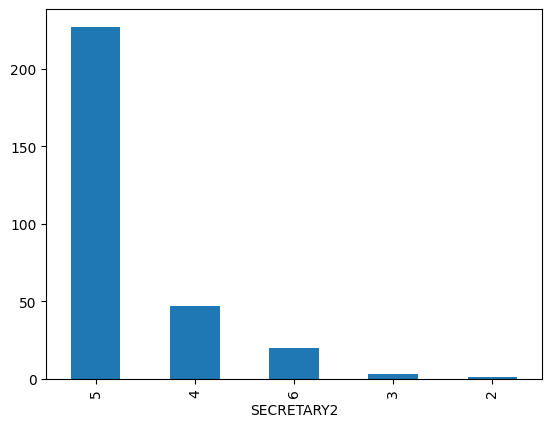

In [177]:
senators['SECRETARY2'].apply(lambda x: len(x.split(", "))).value_counts().plot(kind='bar')

In [164]:
senators = pd.read_csv("senators.csv")
senators

,HG_NM,HJ_NM,ENG_NM,BTH_GBN_NM,BTH_DATE,JOB_RES_NM,POLY_NM,ORIG_NM,ELECT_GBN_NM,CMIT_NM,...,SEX_GBN_NM,TEL_NO,E_MAIL,HOMEPAGE,STAFF,SECRETARY,SECRETARY2,MONA_CD,MEM_TITLE,ASSEM_ADDR
0,강기윤,姜起潤,KANG GIYUN,양,1960-06-04,간사,국민의힘,경남 창원시성산구,지역구,보건복지위원회,...,남,02-784-1751,ggotop@naver.com,http://blog.naver.com/ggotop,"강현국, 한영애","김샛별, 장원종","안효상, 빈자영, 이유진, 김지훈, 조옥자",14M56632,[학력]\r\n마산공고(26회)\r\n창원대학교 행정학과\r\n중앙대학교 행정대학원...,의원회관 937호
1,강대식,姜大植,KANG DAESIK,양,1959-11-02,위원,국민의힘,대구 동구을,지역구,국토교통위원회,...,남,02-784-5275,kds21341@naver.com,NaN,"박홍규, 유진영","김기일, 이기백","박순권, 김광연, 김현정, 황인택, 정유미",L2I9861C,[학력]\r\n송정초등학교\r\n안심중학교\r\n경북대학교 사범대학 부속고등학교\r...,의원회관 341호
2,강득구,姜得求,KANG DEUKGU,양,1963-05-27,위원,더불어민주당,경기 안양시만안구,지역구,"인구위기특별위원회, 교육위원회",...,남,02-784-2747~9,mainsail440@daum.net,http://blog.naver.com/dulipapa,"김효성, 홍미하","장진수, 최경순","김창용, 오세령, 배은경, 남소영, 김광택",8P37634C,2023. 4. ~ 현재 더불어민주당 정책위원회 상임부의장\r\n2023...,의원회관 440호
3,강민국,姜旻局,KANG MINKUK,양,1971-03-03,위원,국민의힘,경남 진주시을,지역구,정무위원회,...,남,02-784-0797,strongwind01@naver.com,NaN,"강민승, 정경섭","김종민, 남정만","성환종, 이승연, 서경익, 윤정인, 정다정",GX22581L,[학력]\r\n\r\n\r\n- 봉곡초등학교 졸업(14회)\r\n\r\n- 진주중학...,의원회관 1007호
4,강민정,姜旼姃,KANG MINJUNG,양,1961-04-26,위원,더불어민주당,비례대표,비례대표,교육위원회,...,여,02-784-2477,kmj2020edu@gmail.com,https://blog.naver.com/kmgedu21,"손성조, 윤호숙","김민혜, 김원석","김수안, 김성용, 민지홍, 황연미, 김기만",P2N50879,현) 국회 교육위원회 위원\r\n\r\n전) 더불어민주당 원내소통부대표\r\n전) ...,의원회관 421호
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,홍익표,洪翼杓,HONG IHKPYO,양,1967-11-20,위원장,더불어민주당,서울 중구성동구갑,지역구,"문화체육관광위원회, 국회운영위원회, 정보위원회",...,남,02-784-6887,peace@peacehong.net,http://www.peacehong.net,"신지희, 허정무","김진욱, 전해정","김옥미, 이원종, 이상현, 김다예, 이아연",FRN1867O,더불어민주당 원내대표(현)\r\n더불어민주당 서초구을지역위원장(현)\r\n\r\n[...,의원회관 839호
294,홍정민,洪貞敏,HONG JUNGMIN,양,1978-11-24,위원,더불어민주당,경기 고양시병,지역구,"산업통상자원중소벤처기업위원회, 첨단전략산업특별위원회",...,여,02-784-8950,waytohong@naver.com,https://blog.naver.com/waytohong,"엄소영, 이용남","김윤정, 정주영","김도영, 정윤주, 변민환, 이재환, 서연희",XA42275R,| 학력 | \r\n- 서울대학교 경제학부 졸업(2001년)\r\n- 서울대학교 경...,의원회관 326호
295,황보승희,皇甫承希,HWANGBO SEUNGHEE,양,1976-08-05,위원,무소속,부산 중구영도구,지역구,"문화체육관광위원회, 인구위기특별위원회",...,여,02-784-6931 / 051-412-0415,0415hbsh@naver.com,NaN,"윤경남, 홍영민","고범욱, 김대원","김성윤, 안지홍, 공채원, 김라희, 김보라",J9S37905,이화여자대학교 영어영문학\r\n영도여자고등학교\r\n\r\n(현) 제21대 국회의원...,의원회관 322호
296,황운하,黃雲夏,HWANG UNHA,양,1962-09-10,위원,더불어민주당,대전 중구,지역구,정무위원회,...,남,02-784-1935,unhah0301@gmail.com,NaN,"유승준, 정종훈","심대철, 장진섭","윤여진, 박병찬, 심준석, 나제임",0YT3774N,<학력>\r\n대전산성초등학교\r\n동산중학교\r\n서대전고등학교\r\n경찰대학교 ...,의원회관 416호


In [199]:
senators.sort_values(by=['POLY_NM', 'BTH_DATE'])

,HG_NM,HJ_NM,ENG_NM,BTH_GBN_NM,BTH_DATE,JOB_RES_NM,POLY_NM,ORIG_NM,ELECT_GBN_NM,CMIT_NM,...,SEX_GBN_NM,TEL_NO,E_MAIL,HOMEPAGE,STAFF,SECRETARY,SECRETARY2,MONA_CD,MEM_TITLE,ASSEM_ADDR
289,홍문표,洪文杓,HONG MOONPYO,양,1947-10-05,위원,국민의힘,충남 홍성군예산군,지역구,농림축산식품해양수산위원회,...,남,02-784-9587,mphonglove@hanmail.net,NaN,"구성완, 백택규",신충식,"이선호, 김슬기, 구민희, 박기현, 엄상현",GD131760,[학력]\r\n\r\n건국대 농화학과(학사)\r\n한양대 행정대학원 사회사업정책학과...,의원회관 336호
157,우신구,禹信九,WOO SHINKU,음,1950-10-01,위원,국민의힘,비례대표,비례대표,국방위원회,...,남,02-784-9630,wooshinku@naver.com,NaN,"문은선, 이창호","송준섭, 윤혁준","신은경, 김일환, 하호진, 박기인, 김희경",F0I5053J,[학력]\r\n고려사이버대학교 사회복지학 학사\r\n국민대학교 명예졸업\r\n국민대...,의원회관 745호
269,최영희,崔英姬,CHOI YOUNGHEE,음,1951-06-02,위원,국민의힘,비례대표,비례대표,보건복지위원회,...,여,02-784-8231,hee709ho@gmail.com,https://blog.naver.com/hee709ho,"배봉수, 정성한","조광현, 한승룡","최승철, 조하나, 최민정, 최세황, 김태은, 김재희",YTA7297R,[주요 약력]\r\n\r\n(現) 제21대 국회 보건복지위원회 위원\r\n\r\n(...,의원회관 709호
119,서병수,徐秉洙,SUH BYUNGSOO,음,1952-01-09,위원,국민의힘,부산 부산진구갑,지역구,"국회 2030 부산세계박람회 유치지원 특별위원회, 교육위원회",...,남,02-784-1885,suhbs8680@naver.com,NaN,"김성수, 김홍식","정재관, 최준연","한경섭, 허정선, 최윤재, 유창은, 고영미",CT85313K,2020.05~ 제21대 국회의원(부산 부산진구갑/국민의힘)\r\n2014.07~2...,의원회관 552호
280,한기호,韓起鎬,HAN KIHO,음,1952-08-13,위원장,국민의힘,강원 춘천시철원군화천군양구군을,지역구,국방위원회,...,남,02-784-3860,NaN,https://blog.naver.com/nombo1,"김민찬, 조재숙","김지혜, 이재희","정다와, 손정희",JQA21112,제 18ㆍ19ㆍ21대 국회의원\r\n\r\n현) 국회 국방위원회 위원장\r\n현) ...,의원회관 908호
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,강은미,姜恩美,KANG EUNMI,양,1970-09-06,위원,정의당,비례대표,비례대표,"보건복지위원회, 연금개혁특별위원회",...,여,02-784-4162,em7086@gmail.com,blog.naver.com/em7086,"이종택, 최철원","박송희, 최예지","장화동, 이신호, 양희도, 문다빈, 유태현",WMG57662,제21대 국회의원 \r\n\r\n정의당 원내대표\r\n정의당 부대표\r\n광주광역시...,의원회관 514호
230,장혜영,張惠英,JANG HYEYEONG,양,1987-04-08,위원,정의당,비례대표,비례대표,"기획재정위원회, 기후위기특별위원회, 예산결산특별위원회",...,여,02-784-1845(의원회관516호),contact@janghyeyeong.com,http://janghyeyeong.com,"전진형, 조현수","서정진, 최기원","박진선, 유완선, 김은지, 정윤호, 백영재",GAV6441G,&quot;존엄과 평등의 새로운 미래를 열겠습니다&quot;\r\n\r\n- 정의당...,의원회관 516호
82,류호정,柳好貞,RYU HOJEONG,양,1992-08-09,위원,정의당,비례대표,비례대표,"문화체육관광위원회, 인구위기특별위원회",...,여,02-784-9740,help@ryuhojeong.com,http://ryuhojeong.com,"염종운, 황윤영","윤지영, 이지은","임동준, 손예지, 김유일, 예윤해, 강다은",NCP9875N,1992년 8월 9일 생\r\n이화여자대학교 사회학과 졸업\r\n\r\n[경력]\r...,의원회관 513호
7,강성희,姜聖熙,KANG SUNGHEE,양,1972-09-07,위원,진보당,전북 전주시을,지역구,정무위원회,...,남,02-6788-6961,ksh210523@gmail.com,https://blog.naver.com/kangjinbo,"김배곤, 김정엽","곽승용, 김금주","송명숙, 최한별, 박유림, 백건하, 박수정",6FS10566,[주요약력]\r\n現) 진보당 원내대표\r\n 국회 정무위원회 위원\r\n ...,의원회관 523호


In [179]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.762471,-0.252740,-0.156983
Ohio,0.119554,0.414961,0.265160
Texas,1.102615,1.466950,-0.207622
Oregon,2.661171,-2.702339,-0.212661


In [182]:
# 드디어 나왔다. apply. 
# axis를 지정해주지 않으면 index를 기준으로 판단한다. 
# column이 같으면서 index가 다른 것들의 max, min 값. 즉, 열방향
frame.apply(lambda x: x.max() - x.min())

b    2.541617
d    4.169289
e    0.477821
dtype: float64

In [185]:
# index가 같으면서 column이 다른 것들의 max, min 값. 즉, 행방향
# 가로로 뜯어서 들어오는 경우가 더 많다.
def f(x):
    print(x)
    return x.max() - x.min()
frame.apply(f, axis=1)

b    0.762471
d   -0.252740
e   -0.156983
Name: Utah, dtype: float64
b    0.119554
d    0.414961
e    0.265160
Name: Ohio, dtype: float64
b    1.102615
d    1.466950
e   -0.207622
Name: Texas, dtype: float64
b    2.661171
d   -2.702339
e   -0.212661
Name: Oregon, dtype: float64


Utah      1.015212
Ohio      0.295407
Texas     1.674572
Oregon    5.363510
dtype: float64

In [186]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,0.119554,-2.702339,-0.212661
max,2.661171,1.466950,0.265160


#### 정렬과 랭킹 매기기

In [187]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [190]:
obj.sort_values()

d    0
a    1
b    2
c    3
dtype: int64

In [195]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_values(by = ['b','a'])
# frame.sort_index(axis=1)

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [ ]:
frame.sort_index(axis=1, ascending=False)

In [ ]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame


In [ ]:
# 2개도 된다.
frame.sort_values(by=['a', 'b'])

#### 유니크, 빈도 세기

In [223]:
senators.columns

Index(['HG_NM', 'HJ_NM', 'ENG_NM', 'BTH_GBN_NM', 'BTH_DATE', 'JOB_RES_NM',
       'POLY_NM', 'ORIG_NM', 'ELECT_GBN_NM', 'CMIT_NM', 'CMITS',
       'REELE_GBN_NM', 'UNITS', 'SEX_GBN_NM', 'TEL_NO', 'E_MAIL', 'HOMEPAGE',
       'STAFF', 'SECRETARY', 'SECRETARY2', 'MONA_CD', 'MEM_TITLE',
       'ASSEM_ADDR'],
      dtype='object')

<Axes: xlabel='BTH_DATE'>

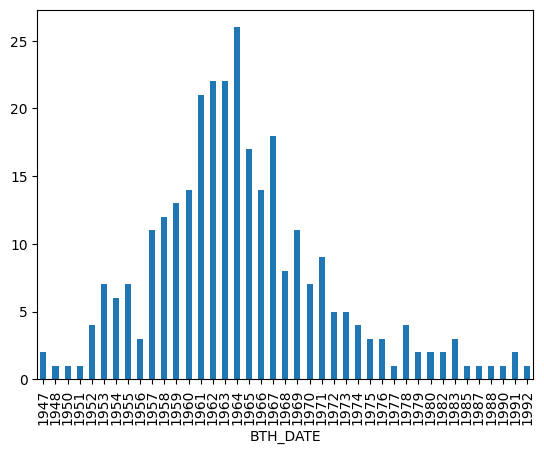

In [222]:
import datetime
senators['BTH_DATE'].apply(lambda x: x.split("-")[0]).value_counts().sort_index().plot(kind='bar')

In [ ]:
uniques = obj.unique()
uniques

In [242]:
senators.columns

Index(['HG_NM', 'HJ_NM', 'ENG_NM', 'BTH_GBN_NM', 'BTH_DATE', 'JOB_RES_NM',
       'POLY_NM', 'ORIG_NM', 'ELECT_GBN_NM', 'CMIT_NM', 'CMITS',
       'REELE_GBN_NM', 'UNITS', 'SEX_GBN_NM', 'TEL_NO', 'E_MAIL', 'HOMEPAGE',
       'STAFF', 'SECRETARY', 'SECRETARY2', 'MONA_CD', 'MEM_TITLE',
       'ASSEM_ADDR'],
      dtype='object')

In [258]:
# senators['BTH_YEAR'] = senators['BTH_DATE'].apply(lambda x: int(x.split('-')[0]))
senators.groupby(['POLY_NM'])['BTH_YEAR'].apply(lambda x: np.mean(x))

POLY_NM
국민의힘      1962.946903
기본소득당     1990.000000
더불어민주당    1964.981707
무소속       1963.750000
정의당       1974.166667
진보당       1972.000000
한국의희망     1967.000000
Name: BTH_YEAR, dtype: float64